In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re



In [3]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Set Seaborn style for beautiful plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
# 1. Load the dataset
data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', 
                   names=['Tweet_ID', 'entity', 'sentiment', 'Tweet_content'])

In [6]:
data.head()

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
# 2. Exploratory Data Analysis (EDA)
# Display basic info
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

First 5 Rows:
   Tweet_ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet_content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murd

In [8]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Tweet_ID           0
entity             0
sentiment          0
Tweet_content    686
dtype: int64


In [9]:
# Drop rows with missing Tweet_content
data = data.dropna(subset=['Tweet_content'])

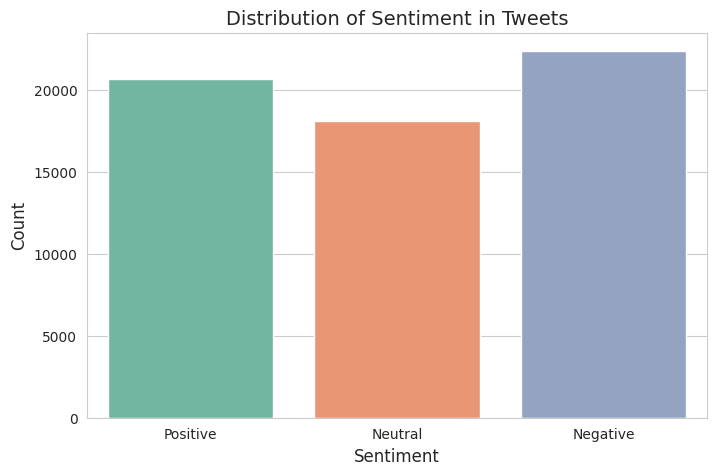

In [10]:
# Plot 1: Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment in Tweets', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('sentiment_distribution.png')
plt.show()

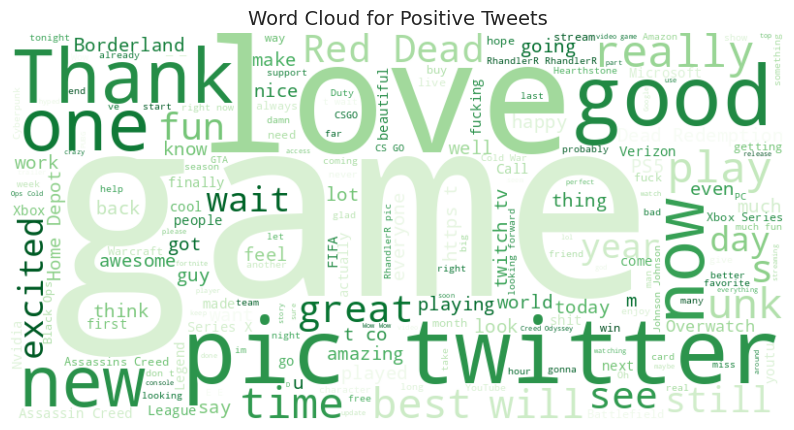

In [11]:
# Plot 2: Word Cloud for Positive Tweets
positive_tweets = ' '.join(data[data['sentiment'] == 'Positive']['Tweet_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_tweets)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets', fontsize=14)
plt.savefig('positive_wordcloud.png')
plt.show()

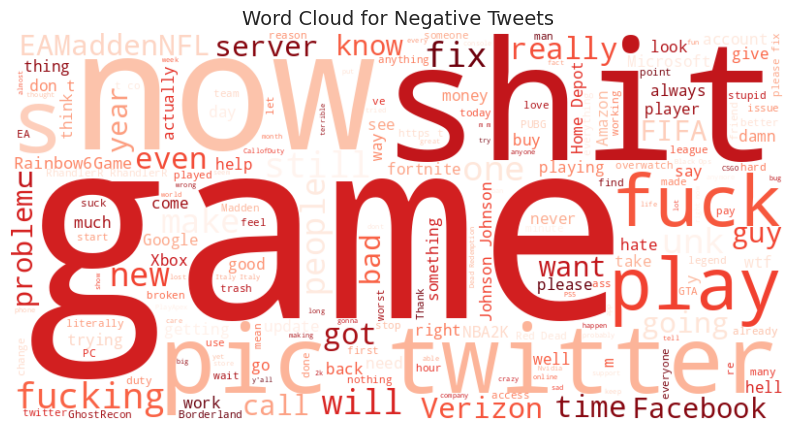

In [12]:
# Plot 3: Word Cloud for Negative Tweets
negative_tweets = ' '.join(data[data['sentiment'] == 'Negative']['Tweet_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_tweets)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets', fontsize=14)
plt.savefig('negative_wordcloud.png')
plt.show()

In [13]:
# 3. Data Preprocessing
# Text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

In [14]:
# Apply text cleaning
data['cleaned_text'] = data['Tweet_content'].apply(clean_text)

In [15]:
# Vectorize text using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text']).toarray()
y = data['sentiment']

In [16]:
 #Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 4. Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
# 5. Model Evaluation
y_pred = lr_model.predict(X_test)

In [19]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [20]:
# Print metrics
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Model Performance:
Accuracy: 0.70
Precision: 0.71
Recall: 0.70
F1-Score: 0.70


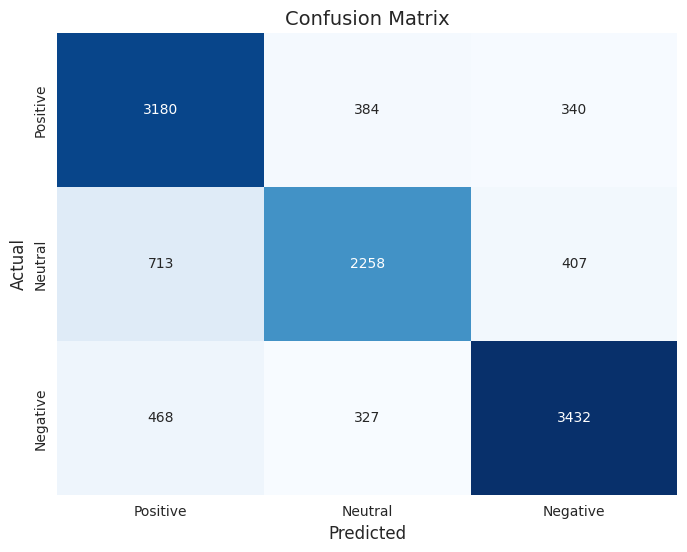

In [21]:
# Plot 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Positive', 'Neutral', 'Negative'], 
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.savefig('confusion_matrix.png')
plt.show()

In [22]:
# 6. Summary
print("\nProject Summary:")
print("The Logistic Regression model successfully classifies tweet sentiment with good accuracy.")
print("Key findings from EDA: Positive tweets often include words like 'great' and 'love', while negative tweets include 'bad' and 'issue'.")
print("The model can be used to monitor sentiment on social media platforms.")


Project Summary:
The Logistic Regression model successfully classifies tweet sentiment with good accuracy.
Key findings from EDA: Positive tweets often include words like 'great' and 'love', while negative tweets include 'bad' and 'issue'.
The model can be used to monitor sentiment on social media platforms.
